In [41]:
import numpy as np 
import pandas
import math
from sklearn.metrics import mean_squared_error

# Plot parameters 
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

In [28]:
HypParams = pandas.read_csv('GeneticAlgorithmParameters.csv')


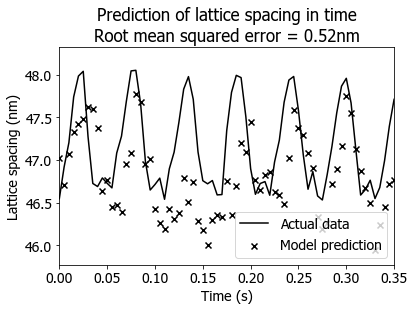

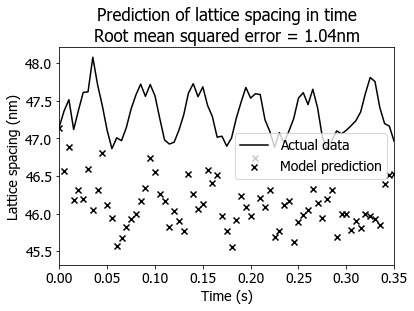

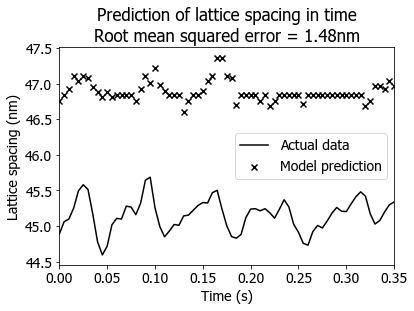

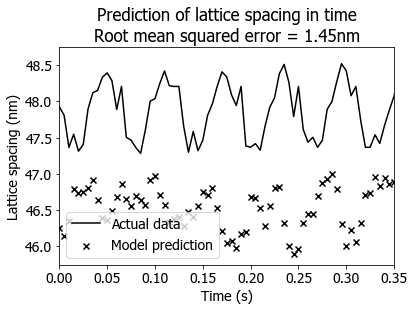

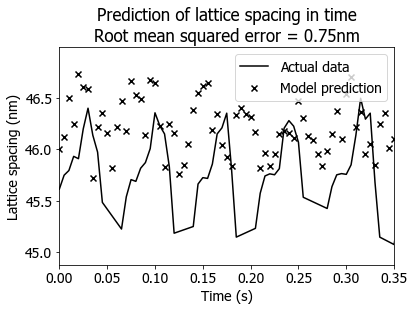

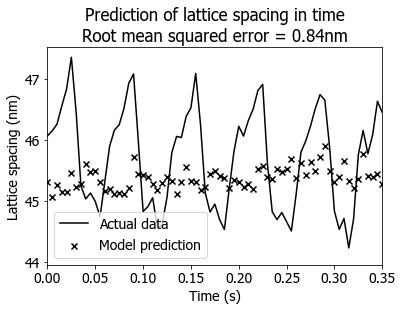

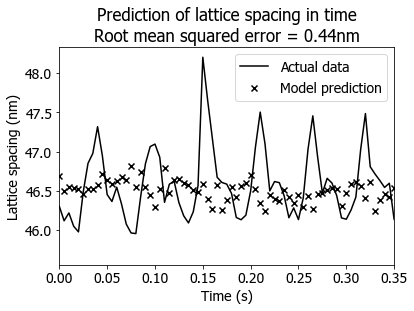

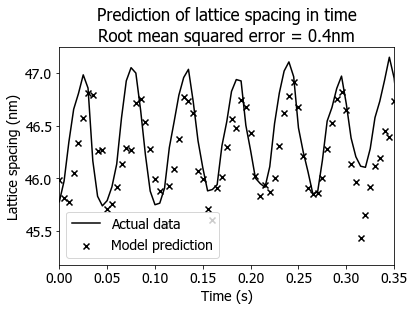

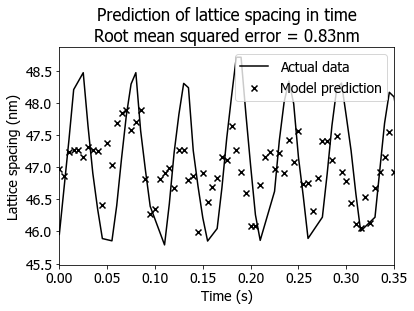

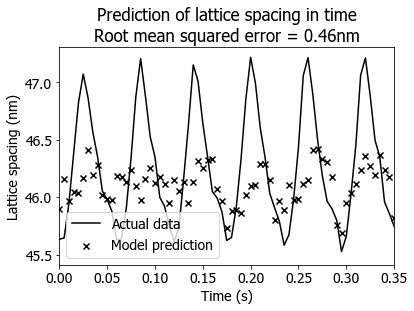

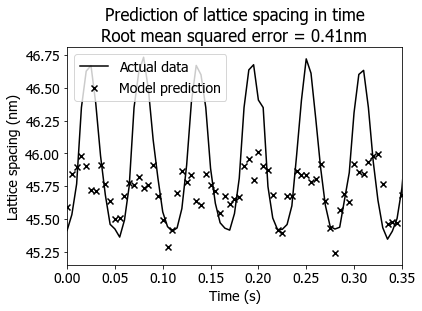

In [49]:
acceptable_trials = ['m07_t01_15', 'm07_t03_15', 'm07_t06_15','m10_t02_16','m11_t02_16','m11_t04_16',
                   'm12_t02_16','m14_t05_16', 'm14_t03_16', 'm15_t01_16', 'm15_t03_16']

rmse = []
for trial_ind in np.arange(0,len(acceptable_trials)):
    # Import data
    TrainX = pandas.read_csv('/Users/sage/Desktop/ML/Train/' + acceptable_trials[trial_ind] + '_TrainX.csv' )
    TrainY = pandas.read_csv('/Users/sage/Desktop/ML/Train/' + acceptable_trials[trial_ind] + '_TrainY.csv' )

    TestX = pandas.read_csv('/Users/sage/Desktop/ML/Test/' + acceptable_trials[trial_ind] + '_TestX.csv' )
    TestY = pandas.read_csv('/Users/sage/Desktop/ML/Test/' + acceptable_trials[trial_ind] + '_TestY.csv' )
    
    # Create a parameter dictionary from the values saved in the CSV file from the Genetic Algorithm
    param = { 'objective':'reg:squarederror',
              'learning_rate': HypParams.at[trial_ind,'learning_rate'],
              'n_estimators': HypParams.at[trial_ind,'n_estimators'], 
              'max_depth': int(HypParams.at[trial_ind,'max_depth']), 
              'min_child_weight': HypParams.at[trial_ind,'min_child_weight'],
              'gamma': HypParams.at[trial_ind,'gamma'], 
              'subsample': HypParams.at[trial_ind,'subsample'],
              'colsample_bytree': HypParams.at[trial_ind,'colsample_bytree'],
              'seed': 24}
    num_round = 100
    
    xgDMatrix = xgb.DMatrix(TrainX, TrainY) #create Dmatrix
    xgbDMatrixTest = xgb.DMatrix(TestX, TestY)
    dMatrixtest = xgbDMatrixTest
    dMatrixTrain = xgDMatrix
    
    xgbT = xgb.train(param, dMatrixTrain, num_round)
    preds = xgbT.predict(dMatrixtest)
    
    rmse.append(mean_squared_error(TestY, preds)**(1/2))
    

    plt.scatter(np.linspace(0, 0+((1/200)*len(preds)),len(preds),endpoint=False), preds, c = 'black', marker = 'x', label = 'Model prediction')
    plt.plot(np.linspace(0, 0+((1/200)*len(TestY)),len(preds),endpoint=False), TestY, c = 'black', label = 'Actual data')
    plt.xlim(0,0.35)
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Lattice spacing (nm)')
    plt.title('Prediction of lattice spacing in time\nRoot mean squared error = ' + str(round(mean_squared_error(TestY, preds)**(1/2), 2)) + 'nm')
    plt.show()


In [54]:
np.mean(rmse)

0.7843033774524152